In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import acquire, prepare
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
# prepare the data
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [6]:
train, validate, test = prepare.prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 10), (214, 10), (179, 10))

In [7]:
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [8]:
establish_baseline(y_train)

0.6164658634538153

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [10]:
accuracy_train = knn.score(X_train, y_train)
accuracy_train

0.7429718875502008

In [11]:
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,266,41
Actual 1,87,104


In [12]:
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.753541,0.717241,0.742972,0.735391,0.739619
recall,0.866450,0.544503,0.742972,0.705476,0.742972
f1-score,0.806061,0.619048,0.742972,0.712554,0.734335
support,307.000000,191.000000,0.742972,498.000000,498.000000


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [13]:
def print_cm_metrics(cm):
    # extract tp, tn, fp, fn from the confusion matrix to use in calculations
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)
    print(f"Accuracy: {accuracy}")

    true_positive_rate = tp/(tp + fn)
    print(f"True Positive Rate: {true_positive_rate}")

    false_positive_rate = fp/(fp + tn)
    print(f"False Positive Rate: {false_positive_rate}")

    true_negative_rate = tn/(tn + fp)
    print(f"True Negative Rate: {true_negative_rate}")

    false_negative_rate = fn/(fn + tp)
    print(f"False Negative Rate: {false_negative_rate}")

    precision = tp/(tp + fp)
    print(f"Precision: {precision}")

    recall = tp/(tp + fn)
    print(f"Recall: {recall}")

    f1_score = 2*(precision*recall)/(precision+recall)
    print(f"F1 Score: {f1_score}")

    support_pos = tp + fn
    print(f"Support (0): {support_pos}")

    support_neg = fp + tn
    print(f"Support (1): {support_neg}")
    
print_cm_metrics(cm)

Accuracy: 0.7429718875502008
True Positive Rate: 0.5445026178010471
False Positive Rate: 0.13355048859934854
True Negative Rate: 0.8664495114006515
False Negative Rate: 0.45549738219895286
Precision: 0.7172413793103448
Recall: 0.5445026178010471
F1 Score: 0.6190476190476191
Support (0): 191
Support (1): 307


#### 4. Run through steps 1-3 setting k to 10

In [14]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    # create the object
    knn = KNeighborsClassifier(n_neighbors=k)

    # create the model
    knn.fit(X_train, y_train)

    # run the model
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred

def evaluate_clf(model, X, y, y_pred):
    # model score
    accuracy = model.score(X, y)
    print(f'Accuracy: {accuracy}')

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('Confusion Matrix')
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1']))

    # classification report
    print('Classification Report')
    print(pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)))
    # confusion matrix metrics
    print_cm_metrics(cm)
    
    return accuracy

In [15]:
k = 10
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, X_train, y_train, X_validate)

KNN where K = 10


In [16]:
y_train_pred, y_validate_pred

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

Train Evaluation

Accuracy: 0.6967871485943775
Confusion Matrix
          Pred 0  Pred 1
Actual 0     284      23
Actual 1     128      63
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.689320    0.732558  0.696787    0.710939      0.705904
recall       0.925081    0.329843  0.696787    0.627462      0.696787
f1-score     0.789986    0.454874  0.696787    0.622430      0.661459
support    307.000000  191.000000  0.696787  498.000000    498.000000
Accuracy: 0.6967871485943775
True Positive Rate: 0.3298429319371728
False Positive Rate: 0.0749185667752443
True Negative Rate: 0.9250814332247557
False Negative Rate: 0.6701570680628273
Precision: 0.7325581395348837
Recall: 0.3298429319371728
F1 Score: 0.4548736462093863
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.616822429906542
Confusion Matrix
          Pred 0  Pred 1
Actual 0     115      17
Actual 1      65      17
Classification Report
                  

#### 5. Run through steps 1-3 setting k to 20

In [18]:
k = 20
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 20
Train Evaluation

Accuracy: 0.6666666666666666
Confusion Matrix
          Pred 0  Pred 1
Actual 0     288      19
Actual 1     147      44
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.662069    0.698413  0.666667    0.680241      0.676008
recall       0.938111    0.230366  0.666667    0.584239      0.666667
f1-score     0.776280    0.346457  0.666667    0.561369      0.611428
support    307.000000  191.000000  0.666667  498.000000    498.000000
Accuracy: 0.6666666666666666
True Positive Rate: 0.23036649214659685
False Positive Rate: 0.06188925081433225
True Negative Rate: 0.9381107491856677
False Negative Rate: 0.7696335078534031
Precision: 0.6984126984126984
Recall: 0.23036649214659685
F1 Score: 0.3464566929133858
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.6495327102803738
Confusion Matrix
          Pred 0  Pred 1
Actual 0     122      10
Actual 1      65      17
Classification Repo

#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [19]:
metrics = []

for k in range(1,20):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_validate)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)

In [20]:
eval_df = pd.DataFrame(metrics)
# add a difference column of diff between train and validate
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.551402,0.448598
1,2,0.777108,0.593458,0.183650
2,3,0.799197,0.588785,0.210412
3,4,0.755020,0.607477,0.147543
4,5,0.742972,0.612150,0.130822
5,6,0.722892,0.616822,0.106069
6,7,0.722892,0.616822,0.106069
7,8,0.704819,0.616822,0.087997
8,9,0.714859,0.598131,0.116729
9,10,0.696787,0.616822,0.079965


In [24]:
# the k1 model performs best on our sample data.

#### 7. Which model performs best on our out-of-sample data from validate?

In [21]:
k = 15
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)

print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 15
Train Evaluation

Accuracy: 0.678714859437751
Confusion Matrix
          Pred 0  Pred 1
Actual 0     272      35
Actual 1     125      66
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.685139    0.653465  0.678715    0.669302      0.672991
recall       0.885993    0.345550  0.678715    0.615772      0.678715
f1-score     0.772727    0.452055  0.678715    0.612391      0.649738
support    307.000000  191.000000  0.678715  498.000000    498.000000
Accuracy: 0.678714859437751
True Positive Rate: 0.34554973821989526
False Positive Rate: 0.11400651465798045
True Negative Rate: 0.8859934853420195
False Negative Rate: 0.6544502617801047
Precision: 0.6534653465346535
Recall: 0.34554973821989526
F1 Score: 0.452054794520548
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.6401869158878505
Confusion Matrix
          Pred 0  Pred 1
Actual 0     113      19
Actual 1      58      24
Classification Report


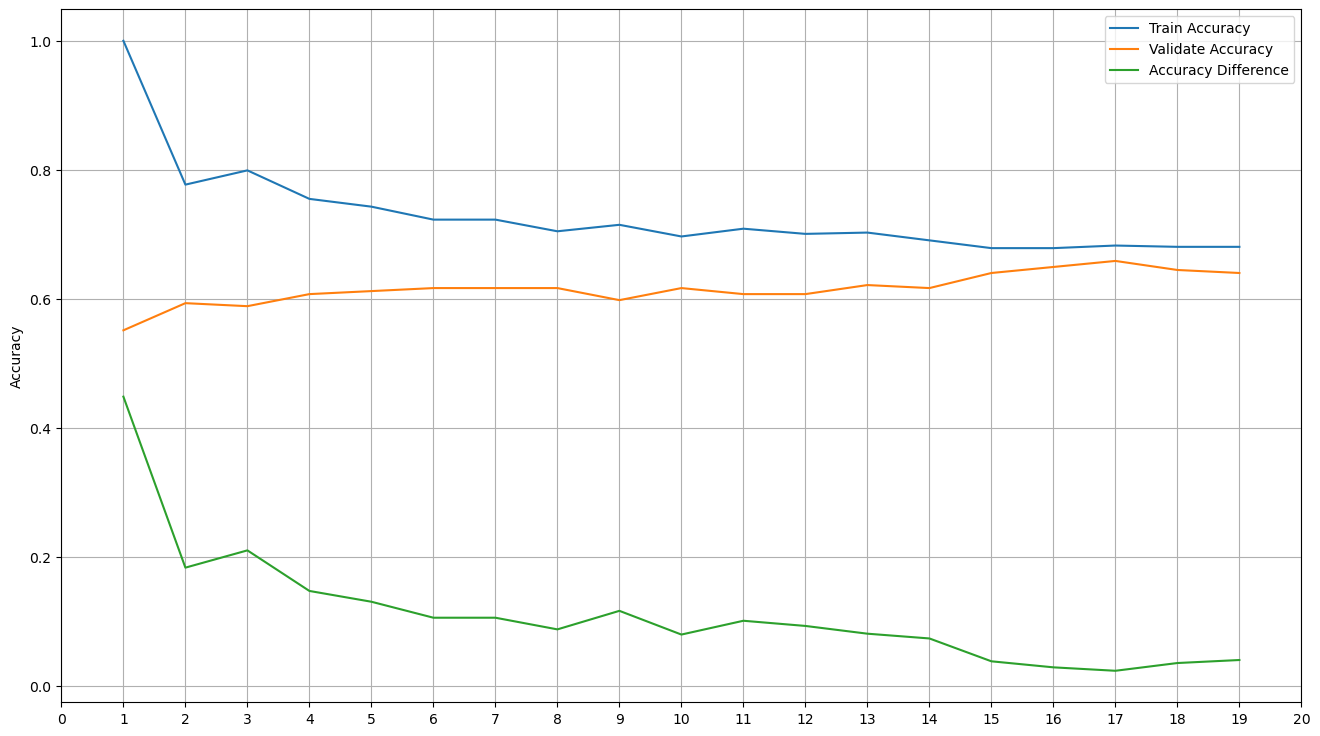

In [22]:
# plot the data
plt.figure(figsize=(16,9))
# plot train accuracy against k
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
# plot validate accuracy against k
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
# plot the difference against k
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()#### 

In [23]:
# k3 has the best validate accuracy. 